In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [6]:
data = pd.read_csv("./card_transdata.csv")
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [8]:
# Separar las características de la variable objetivo
X = data.drop('fraud', axis=1)
y = data['fraud']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar el análisis de componentes principales
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Obtener la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Obtener los pesos de cada atributo en el primer componente principal
first_component_weights = pca.components_[0]

# Crear un dataframe para mostrar los pesos de cada atributo
weights_df = pd.DataFrame({'Attribute': X.columns, 'Weight': first_component_weights})
weights_df = weights_df.reindex(weights_df['Weight'].abs().sort_values(ascending=False).index)

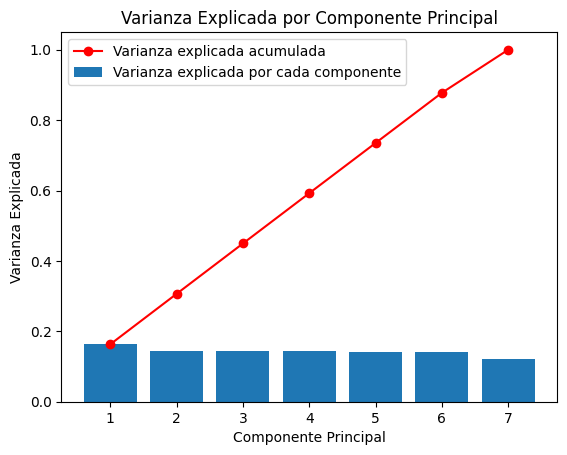

In [10]:

# Visualizar la varianza explicada por cada componente principal
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Varianza explicada por cada componente')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='r', label='Varianza explicada acumulada')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.legend()
plt.show()

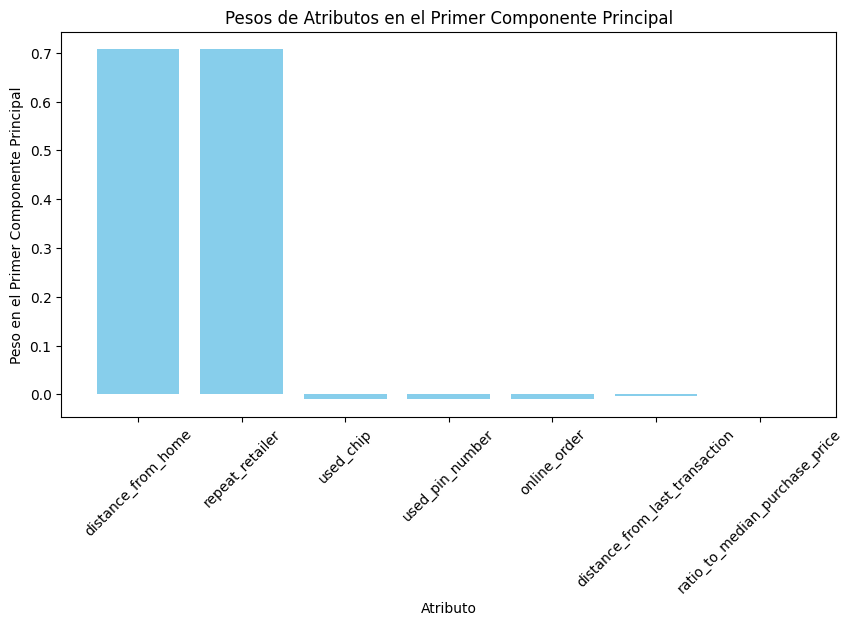

In [11]:
# Visualizar los pesos de cada atributo en el primer componente principal
plt.figure(figsize=(10, 5))
plt.bar(weights_df['Attribute'], weights_df['Weight'], color='skyblue')
plt.xlabel('Atributo')
plt.ylabel('Peso en el Primer Componente Principal')
plt.title('Pesos de Atributos en el Primer Componente Principal')
plt.xticks(rotation=45)
plt.show()

